In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd

import numpy as np
%matplotlib inline

In [4]:
from utils.dataManagers.dataSteward import DataSteward
from utils.dataManagers.informations import informer
columns_desc = informer.get_column_descriptions()

ds = DataSteward()
test = ds.test_data
train = ds.train_data


### Dealing with null values.

In [5]:
def get_nulls_df(input_df):
    return input_df.loc[input_df.isnull().any(axis=1), input_df.isnull().any()]

def get_df_with_columns_contatining_nulls(input_df):
    return input_df.loc[:, input_df.isnull().any()]

def get_null_values_summary(df):
    nulls_df = get_nulls_df(df)
    print(nulls_df.isnull().sum().sort_values(ascending=False))
    print('\nDataframe shape is: ', df.shape)
    print('Rows and columns that contain null values shape is: ', nulls_df.shape)

When it comes to null values, there could have been an error in the data collection process, certain measurements are not applicable, particular felds could have been simply left blank in a survey, for example.

Firsly lets measure size of the problem.

#### Test set: 

In [6]:
get_null_values_summary(test)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Utilities          2
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Exterior2nd        1
Exterior1st        1
GarageArea         1
KitchenQual        1
SaleType           1
GarageCars         1
dtype: int64

Dataframe shape is:  (1459, 79)
Rows and columns that contain null values shape is:  (1459, 33)


#### Train set:

In [7]:
get_null_values_summary(train)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageFinish      81
GarageQual        81
GarageType        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64

Dataframe shape is:  (1460, 79)
Rows and columns that contain null values shape is:  (1460, 19)


Lack of data is a problem here, dropping rows or columns with null values wouldn't be wise decision. We may may end up removing too many samples, which will make a reliable analysis impossible or we will loose valuable information- *information about missing value is also useful information*.
We also can't drop it simply because kaggle rater would not accept our solution, so we have to deal with it in another way.

Let's look closer to our data.

In [8]:
train.groupby(by='Neighborhood').LotFrontage.mean() - test.groupby(by='Neighborhood').LotFrontage.mean()

Neighborhood
Blmngtn     0.809524
Blueste    -4.125000
BrDale      0.133929
BrkSide     3.714349
ClearCr   -13.395604
CollgCr     0.810199
Crawfor     3.662021
Edwards     2.705763
Gilbert    10.151745
IDOTRR      0.424528
MeadowV     4.022222
Mitchel    -8.435185
NAmes       2.483530
NPkVill     6.214286
NWAmes     -0.486111
NoRidge     0.640693
NridgHt    -4.313823
OldTown     1.930657
SWISU      -0.325052
Sawyer     -0.222500
SawyerW     1.571429
Somerst     0.226190
StoneBr     0.930769
Timber     -2.162963
Veenker   -21.841270
Name: LotFrontage, dtype: float64

There is visible disctinction between train and test datasets.

In [12]:
train.dtypes

LotFrontage      float64
LotArea            int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
                  ...   
FireplaceQu       object
Foundation        object
Functional        object
GarageCond        object
GarageFinish      object
GarageQual        object
GarageType        object
Heating           object
HeatingQC         object


LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea
Alley


TypeError: unsupported operand type(s) for /: 'str' and 'int'

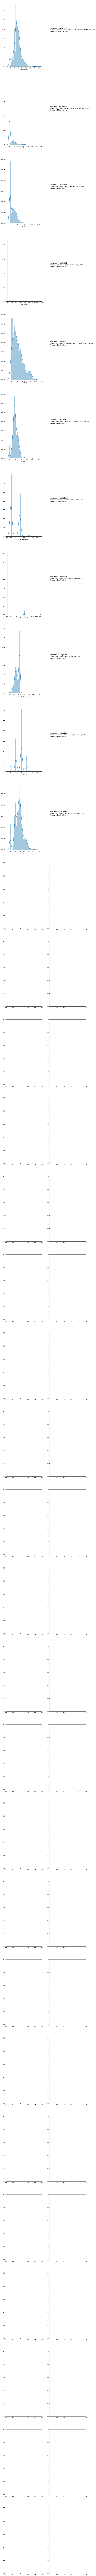

In [10]:
def rotate_x_ticks(ax):
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

def get_columns_description(df):
    columns = df.columns
    figsize_ratio=[8, 14]
    ncols=2
    nrows = len(columns)
    fig, ax = plt.subplots(ncols= ncols, nrows=nrows, figsize=(6 * ncols, 12 * nrows))
    
    for i, c in enumerate(columns):
        print(c)
        series = df[c]
        plot_axes = ax[i, 0]
        text = f'\nFor column: {c} \nColumn description: {columns_desc[c]}\nThere are {series.isnull().sum()} null values\n'
        if str(series.dtype) == 'category':
            ordered_val_counts = series.value_counts()
            sns.countplot(series, ax=plot_axes, order=ordered_val_counts.index)
            rotate_x_ticks(plot_axes)
            text += f'Value counts are: \n{ordered_val_counts}'
        else:
            sns.distplot(series.dropna(), ax=plot_axes)
        
        ax[i, 1].text(0, .5, text, fontsize=12)
        ax[i, 1].axis('off')

get_columns_description(get_df_with_columns_contatining_nulls(test))

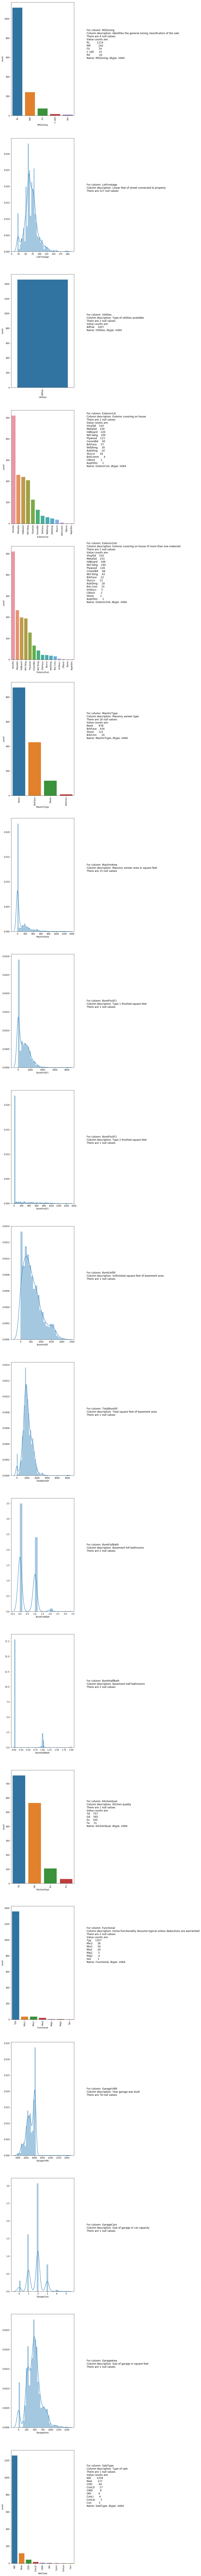

In [132]:
def rotate_x_ticks(ax):
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

def get_columns_description(df):
    columns = df.columns
    figsize_ratio=[8, 14]
    ncols=2
    nrows = len(columns)
    fig, ax = plt.subplots(ncols= ncols, nrows=nrows, figsize=(6 * ncols, 12 * nrows))
    
    for i, c in enumerate(columns):
        series = df[c]
        plot_axes = ax[i, 0]
        text = f'\nFor column: {c} \nColumn description: {columns_desc[c]}\nThere are {series.isnull().sum()} null values\n'
        if str(series.dtype) == 'category':
            ordered_val_counts = series.value_counts()
            sns.countplot(series, ax=plot_axes, order=ordered_val_counts.index)
            rotate_x_ticks(plot_axes)
            text += f'Value counts are: \n{ordered_val_counts}'
        else:
            sns.distplot(series.dropna(), ax=plot_axes)
        
        ax[i, 1].text(0, .5, text, fontsize=12)
        ax[i, 1].axis('off')

get_columns_description(get_df_with_columns_contatining_nulls(test))

We have three types of variables in our dataset- categorical, int and float.
For number values one of the most common interpolation techniques is mean imputation, where we simply replace the missing value by the mean value of the entire feature column.
Here we will use **Imputer** class from scikit-learn. We will also delete Id column as it doesn't give us any information.

In [21]:
def get_number_type_variables(df):
    return df.select_dtypes(['int64', 'float64']) 

train_number_types = get_number_type_variables(train)
test_number_types = get_number_type_variables(test)
del test_number_types['Id']
del train_number_types['Id']

train_number_types.head()
train_number_types.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,836,192,84,0,0,0,0,0,12,2008


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [19]:
from sklearn.preprocessing import Imputer

def fill_missing_values(df, strategy='mean'):
    imr = Imputer(missing_values='NaN', strategy=strategy, axis=0)
    imr = imr.fit(df)
    return pd.DataFrame(imr.transform(df.values), columns=df.columns)

In [23]:
train_number_types_filled = fill_missing_values(train_number_types)
test_number_types_filled = fill_missing_values(test_number_types)

train_number_types_filled.describe()
get_null_values_summary(train_number_types_filled)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,22.024023,9981.264932,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,70.049958,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


NameError: name 'get_null_values_summary' is not defined

When filling null values with mean we have to take into consideration that we loose some of variation in data. For example in LotFrontage standard diviation drops from 24,28 to 22,02.

Now lets take care about categorical variables.

Some of them are nulls 'by design' for example null value in Alley means tha there is no alley access. For those values i provided mapping, and they are mapped to categorical variable on data reading.
But some of them have to be filled. In this part I am using most frequent value to fill nans.

In [6]:
def get_categoricals(df):
    return df.select_dtypes(['category']) 

def categoricals_filled_with_most_frequent_val(df):
    categoricals = get_categoricals(df)
    for c in get_nulls_df(categoricals).columns:
        categoricals.loc[:, c] = df.loc[:, c].fillna(df.loc[:, c].value_counts().idxmax())
    return categoricals

In [11]:
train_categorical_filled = categoricals_filled_with_most_frequent_val(train)
test_categorical_filled = categoricals_filled_with_most_frequent_val(test)

print('Pure dataframe:')
get_null_values_summary(train)
print('\nDataframe after filling')
get_null_values_summary(train_categorigetcal_filled)

c:\users\matka\anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Pure dataframe:
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

Dataframe shape is:  (1460, 80)
Rows and columns that contain null values shape is:  (340, 5)

Dataframe after filling
Series([], dtype: float64)

Dataframe shape is:  (1460, 46)
Rows and columns that contain null values shape is:  (0, 0)


We can see that there are no null values after evaluation. Now we will join numerical and categorical daframes and perform some easy algorithm.

In [12]:
xtrain = train_number_types_filled.join(train_categorical_filled)
xtrain.describe()
xtrain.shape

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,22.024023,9981.264932,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,70.049958,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


(1460, 79)

In [13]:
from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
number_type_normalized = sd.fit_transform(train_number_types_filled)
number_type_normalized = pd.DataFrame(number_type_normalized, columns = train_number_types_filled.columns)

train_categorical = pd.get_dummies(train_categorical_filled)

x_train = train_categorical.join(number_type_normalized)
y_train = ds.train_response


In [16]:
test_number_type_normalized = sd.transform(test_number_types_filled)
test_nt_norm = pd.DataFrame(test_number_type_normalized, columns = test_number_types_filled.columns)

test_categorical = pd.get_dummies(test_categorical_filled)

x_test = test_categorical.join(test_nt_norm)

c:\users\matka\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
c:\users\matka\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


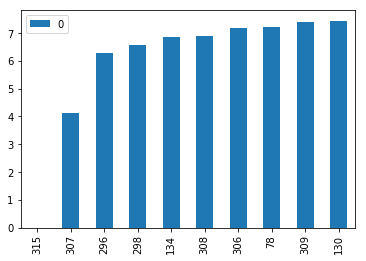

In [63]:
pd.DataFrame(np.log(clf.coef_)).sort_values(by=0)[:10].plot(kind='bar')

In [ ]:
There are differrences in column number- do get dummies before making predictions on whole set

In [14]:
x_train['MSSubClass_150'] = np.zeros(x_train.shape[0])

In [19]:
test_cols = x_test.columns

cols_to_del = []
for tc in x_train.columns:
    if not tc in (test_cols):
        del x_train[tc]
#         print(tc)

In [20]:
x_test.shape
x_train.shape

(1459, 316)

(1460, 316)

In [21]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
from sklearn.metrics import mean_squared_log_error

predictions = pd.DataFrame(clf.predict(x_train))
predictions[predictions < 1] = 1

predictions.describe()
mean_squared_log_error(y_train, predictions)

,0
count,1460.000000
mean,180896.285616
std,76613.259895
min,1.000000
25%,129904.000000
50%,165376.000000
75%,214176.000000
max,702528.000000


0.099725969049964142

In [44]:
predictions = clf.predict(x_test)

predictions

pred = pd.DataFrame(predictions, columns=['SalePrice'])
pred_id = pd.Series(range(1461, 2920))
pred = pred.set_index(pred_id)
pred.describe()

,SalePrice
count,1.459000e+03
mean,-2.024650e+17
std,1.509777e+17
min,-8.046233e+17
25%,-3.135325e+17
50%,-2.442500e+17
75%,-8.127782e+16
max,4.182438e+17


In [349]:
predicted = clf.predict(x_test)
predicted[predicted < 1] = 1

There are many ways to deal with null values, but first we have to think about evaluation metric for our algorithm, since we want to compare it with different approaches. In this kaggle compeption metric is given by creators, it is:

**Root-Mean-Squared-Error (RMSE)** between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.), so we will use it.

in categorical data we treat null values as another category.
Mapping of those null values are in **mapper** class in variable **nan_value_mappings**.

try:
for number values:
* median instead of mean


In [16]:
cols = []
for c in get_categoricals(train).columns:
    if len(train[c].unique()) <= 2:
        cols.append(c)
        
train[cols].describe()

,Street,Utilities,CentralAir
count,1460,1460,1460
unique,2,2,2
top,Pave,AllPub,Y
freq,1454,1459,1365


In [ ]:
def fill_with_mean(data):
    df = data.copy()
    for c in get_columns_with_null_values(df):
        df[c] = df[c].fillna(df[c].mean())
    return df
        
df = fill_with_mean(test)
df.isnull().sum()

In [6]:
ds.test_data.MSZoning.value_counts(dropna=False)

RL         1114
RM          242
FV           74
C (all)      15
RH           10
NaN           4
Name: MSZoning, dtype: int64

In [11]:
mappings = informer.get_column_descriptions()
mappings['MSZoning']

'Identifies the general zoning classification of the sale.'

In [18]:
from utils.dataManagers.informations import informer
mappings = informer.get_nan_value_mappings()
mappings

Alley           No alley access
BsmtCond            No Basement
BsmtExposure        No Basement
BsmtFinType1        No Basement
BsmtFinType2        No Basement
BsmtQual            No Basement
Fence                  No Fence
FireplaceQu        No Fireplace
GarageCond            No Garage
GarageFinish          No Garage
GarageQual            No Garage
GarageType            No Garage
MiscFeature                None
PoolQC                  No Pool
dtype: object

### Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)